# Kaggle

A UK-based online retail store has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017). The organization sells gifts primarily on the online platform. The customers who make a purchase consume directly for themselves. There are small businesses that buy in bulk and sell to other customers through the retail outlet channel.

## Project Objective:
Find significant customers for the business who make high purchases of their favourite products. The organization wants to roll out a loyalty program to the high-value customers after identification of segments. Use the clustering methodology to segment customers into groups:

## Domain: E-commerce

#### Dataset Description:
This is a transnational dataset that contains all the transactions occurring between Nov-2016 to Dec-2017 for a UK-based online retail store.

#### Attribute Description
InvoiceNo Invoice number (A 6-digit integral number uniquely assigned to each transaction)
StockCode Product (item) code
Description Product (item) name
Quantity The quantities of each product (item) per transaction
InvoiceDate The day when each transaction was generated
UnitPrice Unit price (Product price per unit)
CustomerID Customer number (Unique ID assigned to each customer)
Country Country name (The name of the country where each customer resides)
Analysis tasks to be performed:
Use the clustering methodology to segment customers into groups:
Use the following clustering algorithms:

#### K means
Hierarchical
• Identify the right number of customer segments.
• Provide the number of customers who are highly valued.
• Identify the clustering algorithm that gives maximum accuracy and explains robust clusters.
• If the number of observations is loaded in one of the clusters, break down that cluster further using the clustering algorithm. [ hint: Here loaded means if any cluster has more number of data points as compared to other clusters then split that clusters by increasing the number of clusters and observe, compare the results with previous results.]

# Planning IOT (input | output | tasks)

1. Input 

    - Select the MOST VALUABLE CLIENTS t}o engage in a fidellity program called "insiders", using sells data from November/2015 to December/2017

2. Output

    - Point out the customers who are most likelly to be a part of the program "INSIDERS"
    - Report the answers to the following questions:
        -- Who is ellegible for the program?
        
        -- How many clients are going to be a part of the program?
        
        -- Which are the main characteristics of these clients?
        
        -- What is the percentage of revenue coming from this group contribution?
        
        -- What is the expectation of revenue coming from this group for the next few months?
        
        -- Which are the conditions for a person to be elegible to this program?
        
        -- Which are the conditions for a person to be removed from this program?
        
        -- What is the guarantee that the "INSIDERS" program is better than the rest of the customers?
        
        -- Which actions can the marketing team take to increase revenue?
        
3. Tasks

    - Sugesting solutions:
    
        -- Who is ellegible? What defines elligibility? Who is a valuable customer to the company?
        
            * Revenue:
                ** High LTV value
                ** High frequency
                ** Large basket size
                ** Low churn probability
                ** High LTV previsibility
                
            * Cost:
                ** Low devolution number
                
            * Experience:
                ** Good feedback 
        -- How many clients are going to be a part of the program?
        
            * Number of clients
            * % to the total number of clients
        
        -- Which are the main characteristics of these clients?
        
            * Main attributes of clients:
                ** Age
                ** Country
                ** Salary
            
            * Main shopping behaviours
        
        -- What is the percentage of revenue coming from this group contribution?
            
            * Calculate company´s total revenue
            * Calculate INSIDERS cluster revenue
        
        -- What is the expectation of revenue coming from this group for the next few months?
            
            * Calculate LTV of INSIDERS cluster
            * Time series (ARMA, ARIMA, HoltWinter, etc)
        
        -- Which are the conditions for a person to be elegible to this program?
            
            * When is the evaluation taking place?
            * Is the client´s behaviour close to the INSIDERS cluster?
        
        -- Which are the conditions for a person to be removed from this program?
        
            * CLient´s behaviour is not close to the average of INSIDERS cluster
        
        -- What is the guarantee that the "INSIDERS" program is better than the rest of the customers?
        
            * Hypothesis test
            * A/B test
        
        -- Which actions can the marketing team take to increase revenue?
        
            * Discounts
            * Exclusive products
        



# 0. Imports

## Libraries

In [248]:
# Jupyter settings
from IPython.core.display      import display, HTML
from IPython.display           import Image

# data manipulation
import inflection
import datetime
import math
import random
import numpy as np
import pandas as pd
from scipy import stats as ss
from scipy.cluster import hierarchy as hc
import re

# EDA
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px

# import umap
import umap

# sklearn
from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold as mn
from sklearn import ensemble as en
from sklearn import mixture as mx

# metrics
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

## Functions

In [56]:
# jupyter setup
def jupyter_settings():
    
    # jupyter core settings
    display(HTML("<style>.container { width:95% !important; }</style>"))
    
    # pandas
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.expand_frame_repr', False)
    
    # matplotlib
    !pylab inline
    !matplotlib inline
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [35, 12]
    plt.rcParams['font.size'] = 30
    
    # seaborn
    sns.set()
    
    # yellowbrick
    yellowbrick.style.rcmod.set_aesthetic()

    
# descriptive analysis summary for numerical features
def num_analysis(num_attributes):
    
    # Cemtral tendency - mean, median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    # concatenate
    m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis',]
    
    # histogram
    hist = num_attributes.hist(bins=30)
    
    return m

    return hist

In [57]:
jupyter_settings()

/bin/bash: pylab: command not found
/bin/bash: matplotlib: command not found


## Data

In [194]:
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding="iso8859-1")

In [195]:
df_raw = df_raw.drop(columns=["Unnamed: 8"])

# 1. Descriptive Analysis 

In [288]:
df1 = df_raw.copy()

In [289]:
df1

InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16       2.55     17850.0  United Kingdom
1         536365     71053                  WHITE METAL LANTERN         6   29-Nov-16       3.39     17850.0  United Kingdom
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16       2.75     17850.0  United Kingdom
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   29-Nov-16       3.39     17850.0  United Kingdom
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   29-Nov-16       3.39     17850.0  United Kingdom
...          ...       ...                                  ...       ...         ...        ...         ...             ...
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12    7-Dec-17       0.85     12680.0          France
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6    7-Dec-17       2.10     12680.0          France
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4    7-Dec-17       4.15     12680.0          France
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4    7-Dec-17       4.15     12680.0          France
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3    7-Dec-17       4.95     12680.0          France

[541909 rows x 8 columns]

## 1.1. Rows and Columns

In [290]:
print('Number of rows: ', df1.shape[0])
print('Number of columns: ', df1.shape[1])

Number of rows:  541909
Number of columns:  8


In [291]:
# rename columns
snakecase = lambda x: inflection.underscore(x)
df1.columns = list(map(snakecase, df1.columns))

## 1.2. Data Types

In [292]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.3. Check NA

In [293]:
df1['customer_id'].isna().sum()

135080

In [294]:
df1.isna().sum()/df1.shape[0]

invoice_no      0.000000
stock_code      0.000000
description     0.002683
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.249267
country         0.000000
dtype: float64

### Fill NA

In [295]:
# replacing customer_id or dropping?
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [296]:
print(df_not_missing['customer_id'].min())
print(df_not_missing['customer_id'].max())

12346.0
18287.0


In [297]:
df1 = df_not_missing.copy()

In [ ]:
# create customer_id for each unique invoice_no (purchase event) associated with a null customer_id, that will invalidade the creation of recency and frquency features for these customers. 
# That may be a possibility for filling null values but may also create distortions in the cluster analysis in the future
# Therefore, this part of the code might be invalidated later and serves only as an example of NA fillout when dropping rows reduces a considerable part of the data 
# df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
# df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup), 1) # customer_id.max() = 18287c

# merge original with reference dataframe
# df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

In [ ]:
# coalesce
# df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# drop extra columns
# df1 = df1.drop(columns=['customer_id_x', 'customer_id_y'], axis=1)

# df1.head(5)

In [298]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.4. Change dtypes

In [299]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)

df1.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id         country
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55        17850  United Kingdom
1     536365      71053                  WHITE METAL LANTERN         6   2016-11-29        3.39        17850  United Kingdom
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75        17850  United Kingdom
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39        17850  United Kingdom
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39        17850  United Kingdom

In [300]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.5. Descriptive Statistics

In [301]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64'])

### Numerical Attributes

attributes      min      max     range          mean    median          std        skew       kurtosis
0     quantity -80995.0  80995.0  161990.0     12.061303      5.00   248.693064    0.182663   94317.563673
1   unit_price      0.0  38970.0   38970.0      3.460471      1.95    69.315077  452.219019  246924.542988
2  customer_id  12346.0  18287.0    5941.0  15287.690570  15152.00  1713.598197    0.029835      -1.179982

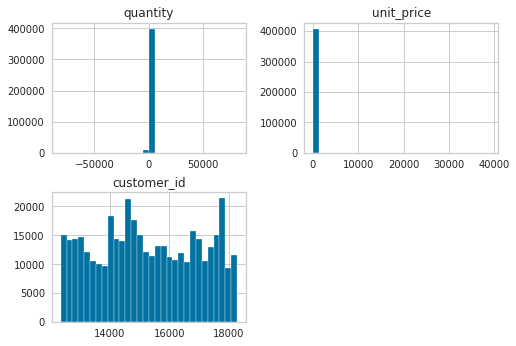

In [302]:
num_analysis(num_attributes)

# negative quantity? may be devolution
# unitary price equal to zero and negative?

### Categorical Attributes

In [303]:
cat_attributes.apply(lambda x: x.unique().shape)

invoice_no  stock_code  description  invoice_date  country
0       22190        3684         3896           305       37

### Invoice No

In [304]:
df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :] # invoice_no with letters

invoice_no stock_code                       description  quantity invoice_date  unit_price  customer_id         country
141       C536379          D                          Discount        -1   2016-11-29       27.50        14527  United Kingdom
154       C536383     35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   2016-11-29        4.65        15311  United Kingdom
235       C536391      22556    PLASTERS IN TIN CIRCUS PARADE        -12   2016-11-29        1.65        17548  United Kingdom
236       C536391      21984  PACK OF 12 PINK PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
237       C536391      21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
...           ...        ...                               ...       ...          ...         ...          ...             ...
540449    C581490      23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   2017-12-07        0.83        14397  United Kingdom
541541    C581499          M                            Manual        -1   2017-12-07      224.69        15498  United Kingdom
541715    C581568      21258        VICTORIAN SEWING BOX LARGE        -5   2017-12-07       10.95        15311  United Kingdom
541716    C581569      84978  HANGING HEART JAR T-LIGHT HOLDER        -1   2017-12-07        1.25        17315  United Kingdom
541717    C581569      20979     36 PENCILS TUBE RED RETROSPOT        -5   2017-12-07        1.25        17315  United Kingdom

[8905 rows x 8 columns]

In [305]:
df_aux = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]

print('Number of invoices with letters: {}'.format(len(df_aux)))
print('Number of invoices with letters and negative quantity: {}'.format(len(df_aux[df_aux['quantity'] < 0])))

Number of invoices with letters: 8905
Number of invoices with letters and negative quantity: 8905


### Stock Code

In [306]:
# check stock codes with only characters
df_aux2 = df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), :]
df_aux2
# ação
# 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

invoice_no stock_code description  quantity invoice_date  unit_price  customer_id         country
45         536370       POST     POSTAGE         3   2016-11-29       18.00        12583          France
141       C536379          D    Discount        -1   2016-11-29       27.50        14527  United Kingdom
386        536403       POST     POSTAGE         1   2016-11-29       15.00        12791     Netherlands
1123       536527       POST     POSTAGE         1   2016-11-29       18.00        12662         Germany
2239       536569          M      Manual         1   2016-11-29        1.25        16274  United Kingdom
...           ...        ...         ...       ...          ...         ...          ...             ...
541216     581494       POST     POSTAGE         2   2017-12-07       18.00        12518         Germany
541541    C581499          M      Manual        -1   2017-12-07      224.69        15498  United Kingdom
541730     581570       POST     POSTAGE         1   2017-12-07       18.00        12662         Germany
541767     581574       POST     POSTAGE         2   2017-12-07       18.00        12526         Germany
541768     581578       POST     POSTAGE         3   2017-12-07       18.00        12713         Germany

[1774 rows x 8 columns]

In [307]:
print('Unique stock codes with letters: {}'.format(df_aux2['stock_code'].unique()))
print('Percentage of unique stock codes with letters: {}'.format(df_aux2['stock_code'].shape[0] / df1.shape[0]))
print('Percentage of unique stock codes  with letters and negative quantity: {}'.format(len(df_aux2[df_aux2['quantity'] < 0]) / len(df_aux2)))

Unique stock codes with letters: ['POST' 'D' 'M' 'PADS' 'DOT' 'CRUK']
Percentage of unique stock codes with letters: 0.004360554434418392
Percentage of unique stock codes  with letters and negative quantity: 0.20574971815107101


### Description

In [308]:
df1.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id         country
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55        17850  United Kingdom
1     536365      71053                  WHITE METAL LANTERN         6   2016-11-29        3.39        17850  United Kingdom
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75        17850  United Kingdom
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39        17850  United Kingdom
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39        17850  United Kingdom

### Country

<AxesSubplot:xlabel='country', ylabel='count'>

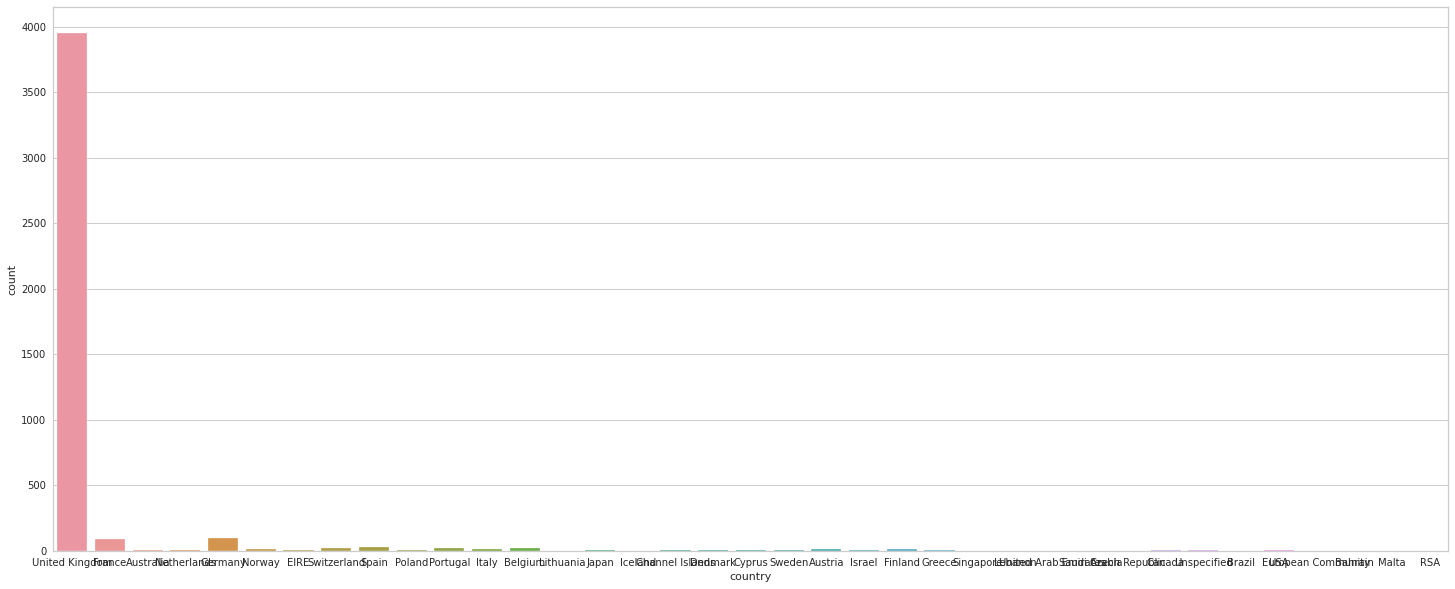

In [309]:
plt.figure(figsize=[25,10])
df_aux4 = df1[['customer_id', 'country']].drop_duplicates()
sns.countplot(x='country',data=df_aux4)

In [310]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().sort_values('customer_id', ascending=False)

customer_id
country                          
United Kingdom               3950
Germany                        95
France                         87
Spain                          31
Belgium                        25
Switzerland                    21
Portugal                       19
Italy                          15
Finland                        12
Austria                        11
Norway                         10
Netherlands                     9
Australia                       9
Denmark                         9
Channel Islands                 9
Cyprus                          8
Sweden                          8
Japan                           8
Poland                          6
USA                             4
Canada                          4
Unspecified                     4
Israel                          4
Greece                          4
EIRE                            3
Malta                           2
United Arab Emirates            2
Bahrain                         2
Czech Republic                  1
Lithuania                       1
Lebanon                         1
RSA                             1
Saudi Arabia                    1
Singapore                       1
Iceland                         1
Brazil                          1
European Community              1

In [311]:
df1['country'].unique() # european comunnity  # Unspecified

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

# 2. Filter

In [312]:
df2 = df1.copy()

In [313]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

In [314]:
# numerical attributes
df2 = df2.loc[df2['unit_price'] >= 0.04, :]
# categorical attributes
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'])]
# description
df2 = df2.drop(columns='description', axis=1)
# map
df2 = df2[~df2['stock_code'].isin(['European Community',  'Unspecified'])]
# bad customer ( devolution and small basket)
df2 = df2[~df2['customer_id'].isin([16446])]
# quantity
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchases = df2.loc[df1['quantity'] >= 0, :]

# 3. Feature Engineering

In [315]:
df3 = df2.copy()
# df2.to_csv('../data/interim/df2.csv')
df3

invoice_no stock_code  quantity invoice_date  unit_price  customer_id         country
0          536365     85123A         6   2016-11-29        2.55        17850  United Kingdom
1          536365      71053         6   2016-11-29        3.39        17850  United Kingdom
2          536365     84406B         8   2016-11-29        2.75        17850  United Kingdom
3          536365     84029G         6   2016-11-29        3.39        17850  United Kingdom
4          536365     84029E         6   2016-11-29        3.39        17850  United Kingdom
...           ...        ...       ...          ...         ...          ...             ...
541904     581587      22613        12   2017-12-07        0.85        12680          France
541905     581587      22899         6   2017-12-07        2.10        12680          France
541906     581587      23254         4   2017-12-07        4.15        12680          France
541907     581587      23255         4   2017-12-07        4.15        12680          France
541908     581587      22138         3   2017-12-07        4.95        12680          France

[405016 rows x 7 columns]

In [316]:
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)
df_ref

customer_id
0           17850
1           13047
2           12583
3           13748
4           15100
...           ...
4356        13436
4357        15520
4358        13298
4359        14569
4360        12713

[4361 rows x 1 columns]

### 1. Monetary

In [317]:
# gross revenue - Quantity x price
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']
                                
# monetary
df_monetary = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

/home/lucas/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lucas/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [318]:
df_ref.isna().sum()

customer_id       0
gross_revenue    27
dtype: int64

### 2. Recency

In [319]:
# days from last purchase
df_recency = df2_purchases.loc[:, ['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
dtype: int64

### 3. Number of purchases

In [320]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                             .groupby( 'customer_id' )
                                                             .count()
                                                             .reset_index()
                                                             .rename( columns={'invoice_no': 'qtde_invoices'}) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
dtype: int64

### 4. Total number of products

In [321]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qtde_items'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
qtde_items       27
dtype: int64

### 5. Number of types of products

In [322]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qtde_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
qtde_items       27
qtde_products    27
dtype: int64

### 6. Average ticket value

In [323]:
# Avg Ticket
df_avg_ticket = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
qtde_items       27
qtde_products    27
avg_ticket       27
dtype: int64

### 7. Average recency days

In [324]:
# Average recency days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=['False', 'False'] )
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoince date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
dtype: int64

### 8. Purchase frequency

In [325]:
df_aux = ( df2_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
frequency             27
dtype: int64

### 9. Number of returns

In [326]:
# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
frequency             27
qtde_returns           0
dtype: int64

### 10. Basket size

- Invoice No = purchase
- Stock Code = Product
- Quantity = Item

In [327]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                  n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
frequency             27
qtde_returns           0
avg_basket_size       27
dtype: int64

### 11. Unique basket size

In [328]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'stock_code', 'nunique' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id                  0
gross_revenue               27
recency_days                27
qtde_invoices               27
qtde_items                  27
qtde_products               27
avg_ticket                  27
avg_recency_days          1387
frequency                   27
qtde_returns                 0
avg_basket_size             27
avg_unique_basket_size      27
dtype: int64

In [329]:
df_ref

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
0           17850        5391.21         372.0           34.0      1733.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647
1           13047        3232.59          56.0            9.0      1390.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667
2           12583        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000
3           13748         948.25          95.0            5.0       439.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000
4           15100         876.00         333.0            3.0        80.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333
...           ...            ...           ...            ...         ...            ...         ...               ...        ...           ...              ...                     ...
4356        13436         196.89           1.0            1.0        76.0           12.0   16.407500               NaN   1.000000           0.0        76.000000               12.000000
4357        15520         343.50           1.0            1.0       314.0           18.0   19.083333               NaN   1.000000           0.0       314.000000               18.000000
4358        13298         360.00           1.0            1.0        96.0            2.0  180.000000               NaN   1.000000           0.0        96.000000                2.000000
4359        14569         227.39           1.0            1.0        79.0           12.0   18.949167               NaN   1.000000           0.0        79.000000               10.000000
4360        12713         794.55           0.0            1.0       505.0           37.0   21.474324               NaN   1.000000           0.0       505.000000               37.000000

[4361 rows x 12 columns]

In [330]:
df_ref.isna().sum()

customer_id                  0
gross_revenue               27
recency_days                27
qtde_invoices               27
qtde_items                  27
qtde_products               27
avg_ticket                  27
avg_recency_days          1387
frequency                   27
qtde_returns                 0
avg_basket_size             27
avg_unique_basket_size      27
dtype: int64

# 4. EDA (Exploratory Data Analysis)

In [442]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 1. Univariate Analysis

## 2. Bivariate Analysis

In [332]:
df42 = df4.drop('customer_id', axis=1)

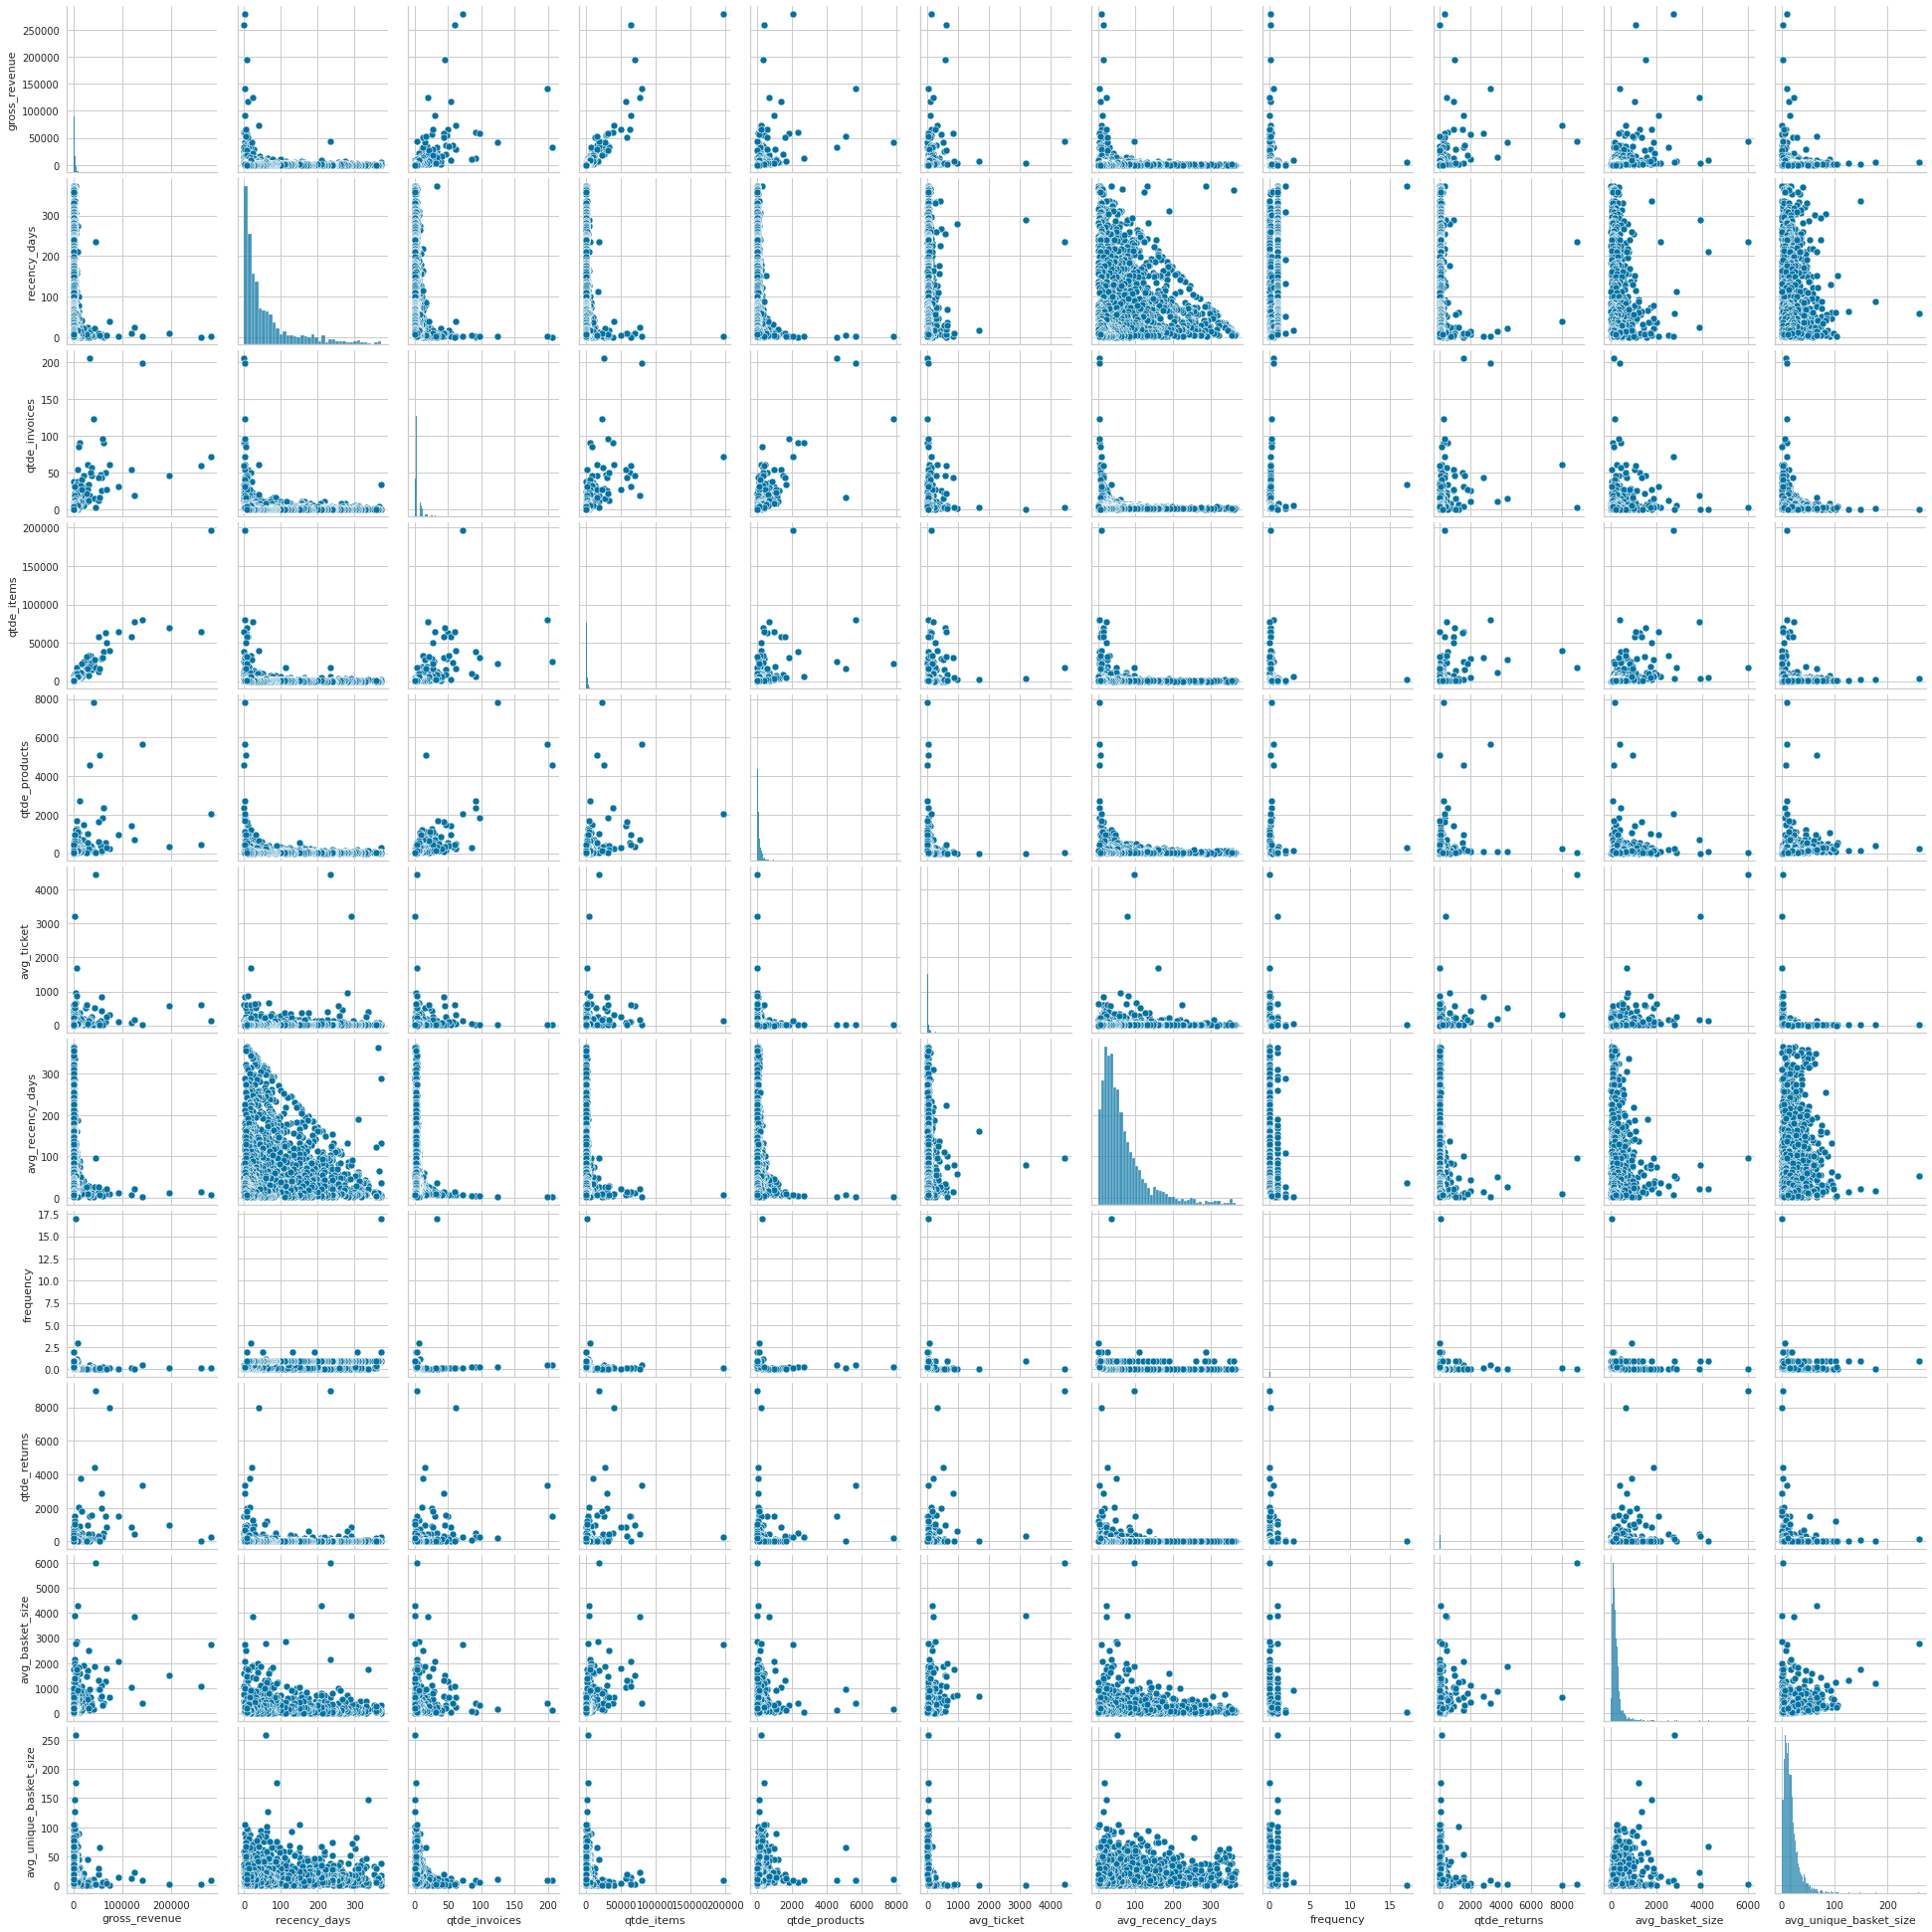

In [333]:
sns.pairplot(df42)

* Frequency and Avg Ticket both have low variance

## 3. Space Study

In [334]:
df4.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_invoices',
       'qtde_items', 'qtde_products', 'avg_ticket', 'avg_recency_days',
       'frequency', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size'],
      dtype='object')

In [484]:
cols_selected = [ 'gross_revenue', 'recency_days','qtde_items', 'qtde_invoices', 'qtde_products', 'avg_ticket', 'avg_recency_days', 'qtde_returns', 'avg_basket_size', 'avg_unique_basket_size'] # qunt_items and qunt_invoices is correlated qith qtd_products
df43 = df4[cols_selected].copy()
df5_aux = df43

In [485]:
mm = pp.MinMaxScaler() # all distributions were assigned for minmax scaler for rescalling
# ss = pp.StandardScaler()
# rs = pp.RobustScaler()

df43['gross_revenue'] = mm.fit_transform(df43[['gross_revenue']])
df43['recency_days'] = mm.fit_transform(df43[['recency_days']])
df43['qtde_items'] = mm.fit_transform(df43[['qtde_items']])
df43['qtde_invoices'] = mm.fit_transform(df43[['qtde_invoices']])
df43['qtde_products'] = mm.fit_transform(df43[['qtde_products']])
df43['avg_ticket'] = mm.fit_transform(df43[['avg_ticket']])
df43['avg_recency_days'] = mm.fit_transform(df43[['avg_recency_days']])
# df43['frequency'] = mm.fit_transform(df43[['frequency']])
df43['qtde_returns'] = mm.fit_transform(df43[['qtde_returns']])
df43['avg_basket_size'] = mm.fit_transform(df43[['avg_basket_size']])
df43['avg_unique_basket_size'] = mm.fit_transform(df43[['avg_unique_basket_size']])

X = df43.copy()

Min:-0.9284758212121497 - Máx:16.98686751744241


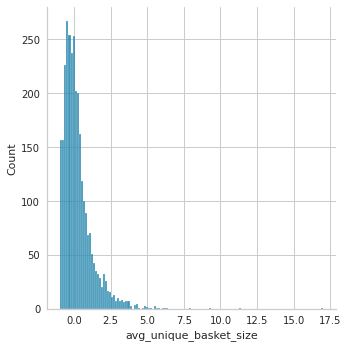

In [461]:
# data as it is
variable = 'avg_unique_basket_size'
print('Min:{} - Máx:{}'.format(df5_aux[variable].min(), df5_aux[variable].max()))
sns.displot(df5_aux[variable]);

Min:-0.6226415094339622 - Máx:73.31132075471699


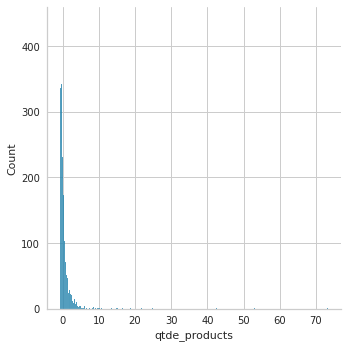

In [446]:
# data as it is
variable = 'qtde_products'
print('Min:{} - Máx:{}'.format(df43[variable].min(), df43[variable].max()))
sns.displot(df5_aux[variable]);

### 3.1. PCA

In [467]:
pca = dd.PCA(n_components=3)
principal_components = pca.fit_transform(X)

<BarContainer object of 3 artists>

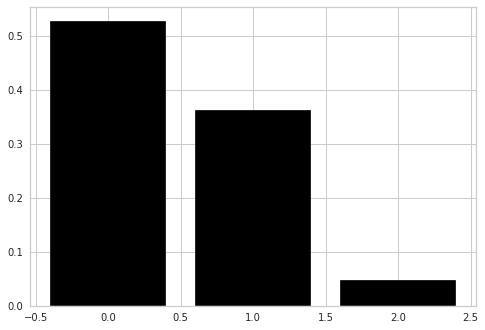

In [468]:
plt.bar(range(pca.n_components_) , pca.explained_variance_ratio_, color='black')

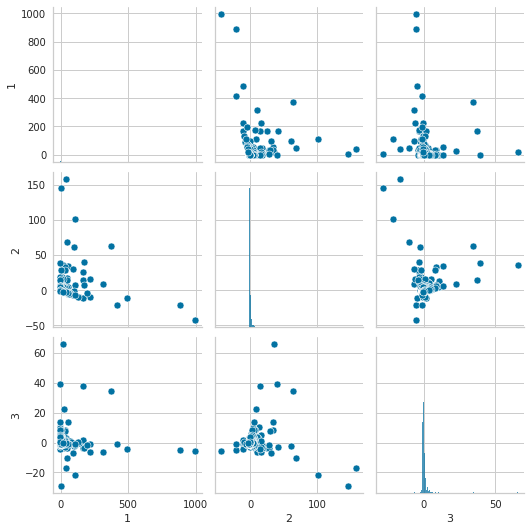

In [449]:
df_pca = pd.DataFrame(principal_components, columns=['1', '2', '3'])
sns.pairplot(df_pca)

In [410]:
fig = px.scatter_3d( df_pca, x='1', y='2', z='3')
fig.show()

In [486]:
pca = dd.PCA(n_components=2)
principal_components = pca.fit_transform(X)

<BarContainer object of 2 artists>

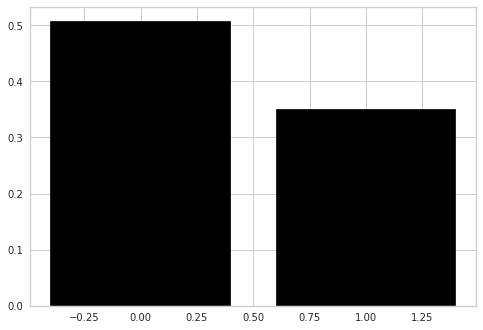

In [487]:
plt.bar(range(pca.n_components_) , pca.explained_variance_ratio_, color='black')

In [488]:
df_pca = pd.DataFrame(principal_components, columns = ['1', '2'])
df_pca

1         2
0     0.821004 -0.006876
1    -0.010080 -0.112927
2    -0.154390 -0.144755
3     0.074449  0.077795
4     0.735283 -0.078001
...        ...       ...
2967 -0.120356 -0.183516
2968 -0.129919 -0.190946
2969 -0.151750 -0.177328
2970 -0.127742 -0.194311
2971 -0.130691 -0.181410

[2972 rows x 2 columns]

<AxesSubplot:xlabel='1', ylabel='2'>

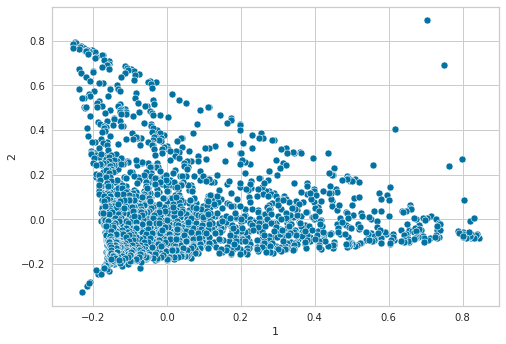

In [489]:
sns.scatterplot(data=df_pca, x='1', y='2')

### 3.2. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

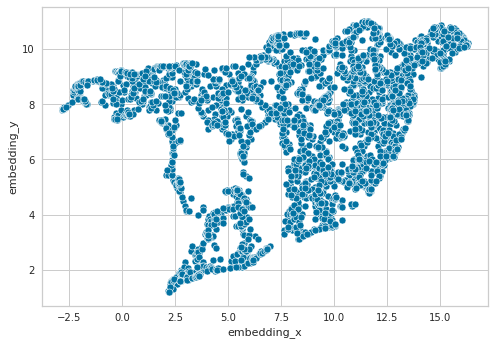

In [490]:
# dimensionality reducer - UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_pca)

### 3.3. t-SNE

/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

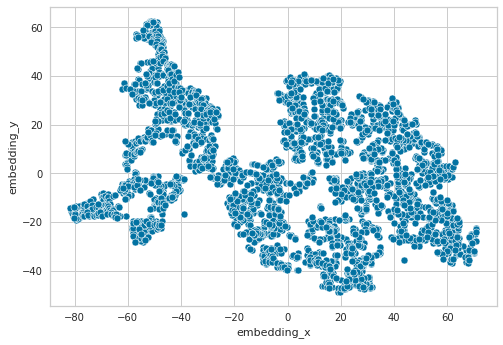

In [491]:
# dimensionality reducer - t-SNE
reducer = mn.TSNE(n_components=2, n_jobs=-1, random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot t-SNE
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_pca)

### 3.4. Tree-Based Embedding

* Article comparing Random forest and Extra-trees regressor for tree-based embedding - https://gdmarmerola.github.io/forest-embeddings/



In [492]:
# training dataset
X = df43.drop(['gross_revenue'], axis=1)
y = df43['gross_revenue'].copy()

# model definition
rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)

# model training
rf_model.fit(X, y)

# leaf
df_leaf = pd.DataFrame(rf_model.apply(X))
df_leaf

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99
0     3177  3162  3270  3224  2256  3154  3123  3080  3129  3114  3154  3281  3117  3115  3124  3211  3130  3071  3087  3262  3006  3035  2917  3072  3340  3121  3273  2794  3074  2951  3319  3273  3077  3349  3153  3343  3417  3015  3097  2935  3334  3243  3220  3165  3176  3135  2824  3344  3384  3364  3197  3106  3084  3370  3327  3337  2853  3364  3256  3341  3433  3284  3164  2995  3196  3057  3124  3304  3145  3285  3353  3272  3228  3276  2787  3166  3349  3058  3197  3128  3049  3323  3377  3113  3306  3194  3350  3132  3086  3278  2927  2876  3091  2799  3452  3152  3237  3381  3345  3303
1     3121  2826  2986  2966  3023  3145  3123  2959  3080  3085  3103  2536  3105  3197  3008  3105  2751  2755  2798  2803  2959  3083  2891  3067  3018  3122  2868  3121  2521  3100  2876  2975  2970  2947  3120  2983  2950  2752  3075  2860  2965  2864  3007  3117  3095  3070  3139  2949  3008  2925  3187  3061  2906  2963  3011  3216  3154  3021  2882  2904  3011  2914  2813  2934  2847  2616  3035  2926  3091  2960  2978  2903  2951  2908  3101  2798  2924  3044  3173  3070  3038  2922  2950  2796  2941  3150  2913  3084  3100  2920  2540  2846  3065  2754  2953  3039  2897  2933  2974  3003
2     3546  3603  3593  3615  3576  3649  3569  3615  3543  3600  3600  3593  3598  3642  3533  3577  3610  3638  3532  3527  3513  3624  3661  3532  3491  3624  3526  3582  3411  3739  3441  3678  3607  3654  3585  3475  3542  3617  3601  3520  3653  3403  3687  3633  3610  3554  3590  3449  3637  3568  3632  3503  3597  3622  3668  3614  3622  3669  3586  3439  3650  3611  3587  3678  3496  3636  3659  3627  3591  3614  3566  3435  3586  3525  3642  3580  3584  3563  3561  3605  3543  3458  3615  3556  3553  3624  3578  3656  3554  3396  3604  3435  3533  3545  3610  3575  3542  3623  3471  3666
3     1422  2067  1593  1498  2169  1311  1549  1995  1225  1772  2057  2306  1532  1612  2085  1956  2261  1370  1956  1423  1858  2062  1540  1913  1278  2178  1285  1553  1861  1759  1495  1582  1383  1485  1526  1605  2184  2090  1700  1547  1539  1578  1580  1347  1698  1407  1540  1402   947  1673  1564  1581  1494  2160  2154  1490  1596  2150  1446  2036  1270  1514  2091  1629  1861  1417  2161  1807  1783  1400  2319  1577  1556  2190  1727  2074  1420  1595  1943  1948  1857  1347  1760  1509  2039  1541  1299  2099  1636  1572  1783  2048  2087  1484  1921  2221  1290  1846  2023  2131
4      198   724   184   697   191   440   216   702   186   183   571   688   218   842   145   185   590   239   602   726   730   562   434   161   834   768   600   331   149   757   720   233   185   333   210   763   352   183   601   587   572   193   319   598   604   566   907   667   695   593   605   921   358   501   201   199   576   218   676   588   209   755   706   199   717   420   571   571   686   712   235   190   330   816   722   485   230   463   155   183   591   875   596   305   587   196   584   749   199   678   318   165   697   189   190   108   570   722   726   211
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  

<AxesSubplot:xlabel='1', ylabel='2'>

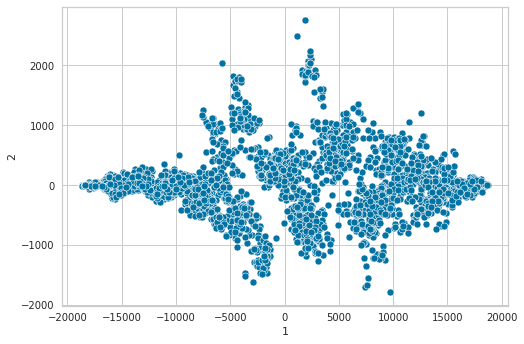

In [493]:
# dimensionality reducer - PCA
pca = dd.PCA(n_components=2)
principal_components = pca.fit_transform(df_leaf)

# embedding
df_pca = pd.DataFrame(principal_components, columns=['1', '2'])

# plot UMAP
sns.scatterplot(x='1', y='2', data=df_pca) 

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

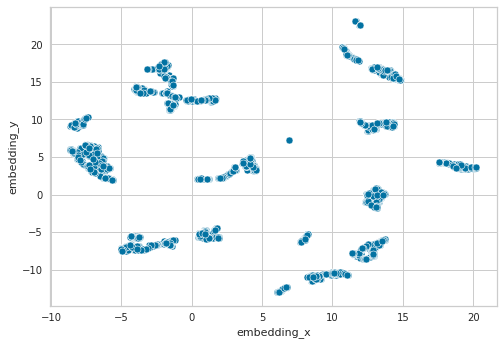

In [494]:
# dimensionality reducer - UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)

# embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tree)

/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

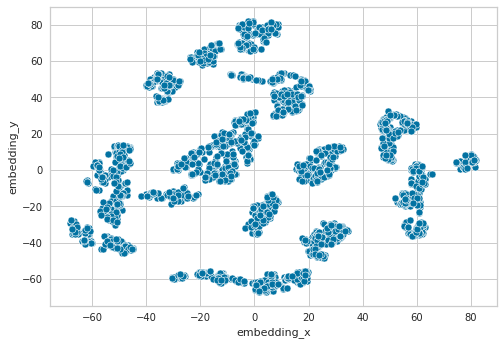

In [495]:
# dimensionality reducer - t-SNE
reducer = mn.TSNE(n_components=2, n_jobs=-1,random_state=42)
embedding = reducer.fit_transform(df_leaf)

# embedding
df_tree_2 = pd.DataFrame()
df_tree_2['embedding_x'] = embedding[:, 0]
df_tree_2['embedding_y'] = embedding[:, 1]

# plot t-SNE
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tree_2)

* Candidates for testing: 
    - PCA
    - Embedding + UMAP
    - Embedding + t-SNE

# 5. Data Preparation 

In [31]:
# df5 = df4.copy()

# 6. Feature Selection

In [32]:
# df6 = df5.copy()

# 7. Hyper Parameter Fine Tuning

In [496]:
X = df_tree.copy()
X.head()

embedding_x  embedding_y
0    17.633606     4.327719
1    13.442041     0.324930
2    11.764593    17.922956
3     0.483723     2.144440
4    -1.335568    14.516305

In [497]:
clusters = np.arange(2, 25, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

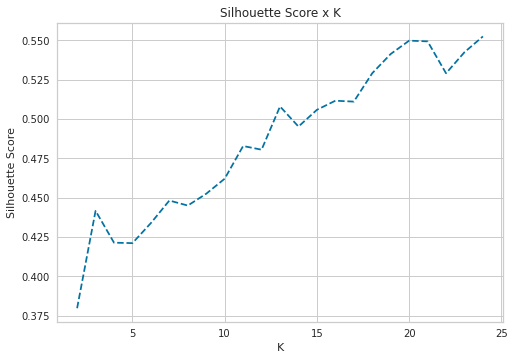

In [498]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans.fit(X)
    
    # model predict
    labels = kmeans.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)    

plt.plot(clusters, wss, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## GMM

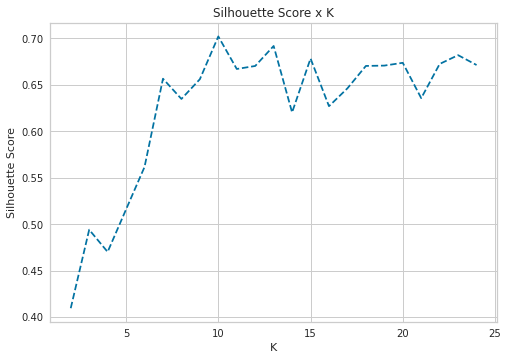

In [499]:
gmm_list = []
for k in clusters:
    # model definition
    gmm = mx.GaussianMixture(n_components=k)
    
    # model training
    gmm.fit(X)
    
    # model predict
    labels = gmm.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)    

plt.plot(clusters, gmm_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## Hierarchical Clustering

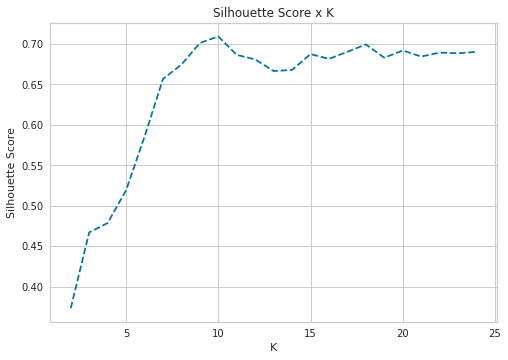

In [500]:
hc_list = []
for k in clusters:
    # model definition & training 
    hc_model = hc.linkage(X, 'ward')
    
    # model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    # metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

plt.plot(clusters, hc_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## DBSCAN

In [531]:
eps=2.00
min_samples=20

# model definition
dbscan_model = c.DBSCAN(eps=eps, min_samples=min_samples)

# model training & prediction
labels = dbscan_model.fit_predict(X)

sil = m.silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: {}'.format(sil))
print('Number of Clusters: {}'.format(len(np.unique(labels))))
print(np.unique(labels))

Silhouette Score: 0.6810207962989807
Number of Clusters: 14
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]


### Results

In [506]:
df_results = pd.DataFrame({'KMeans':kmeans_list, 'GMM':gmm_list, 'HClustering':hc_list}).T
df_results.style.highlight_max(color='yellow', axis=1)

## 7.1. Silhouette Analysis

In [507]:
# fig, ax = plt.subplots(3,2, figsize=(20,20))
# 
# for k in clusters:
#     km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(k, 2)
#     
#     visualizer = yellowbrick.cluster.SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(X)
#     visualizer.finalize()

# 8. Modelling and Cluster Analysis

In [537]:
# model definition & training 
hc_model = hc.linkage(X, 'ward')
    
# model predict
labels = hc.fcluster(hc_model, 8, criterion='maxclust')

X['clusters'] = labels

X.head()

embedding_x  embedding_y  clusters
0    17.633606     4.327719         5
1    13.442041     0.324930         5
2    11.764593    17.922956         3
3     0.483723     2.144440         7
4    -1.335568    14.516305         1

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

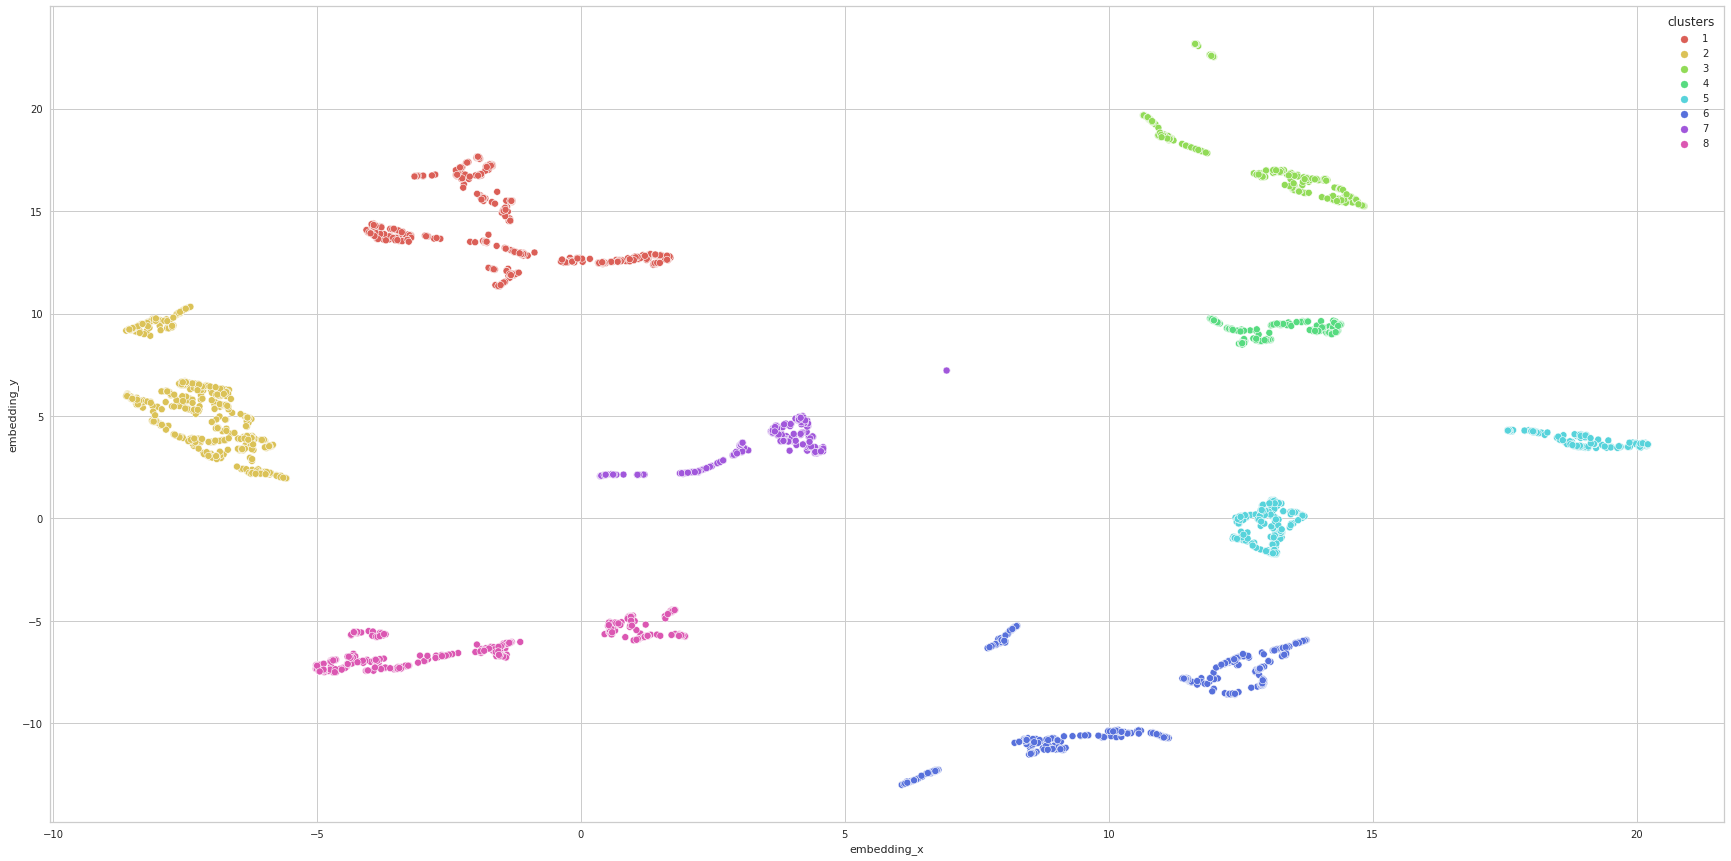

In [545]:
plt.figure(figsize=(30, 15))
sns.scatterplot(x='embedding_x', y='embedding_y', hue='clusters',palette=sns.color_palette('hls', n_colors=len(X['clusters'].unique())), data=X)

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

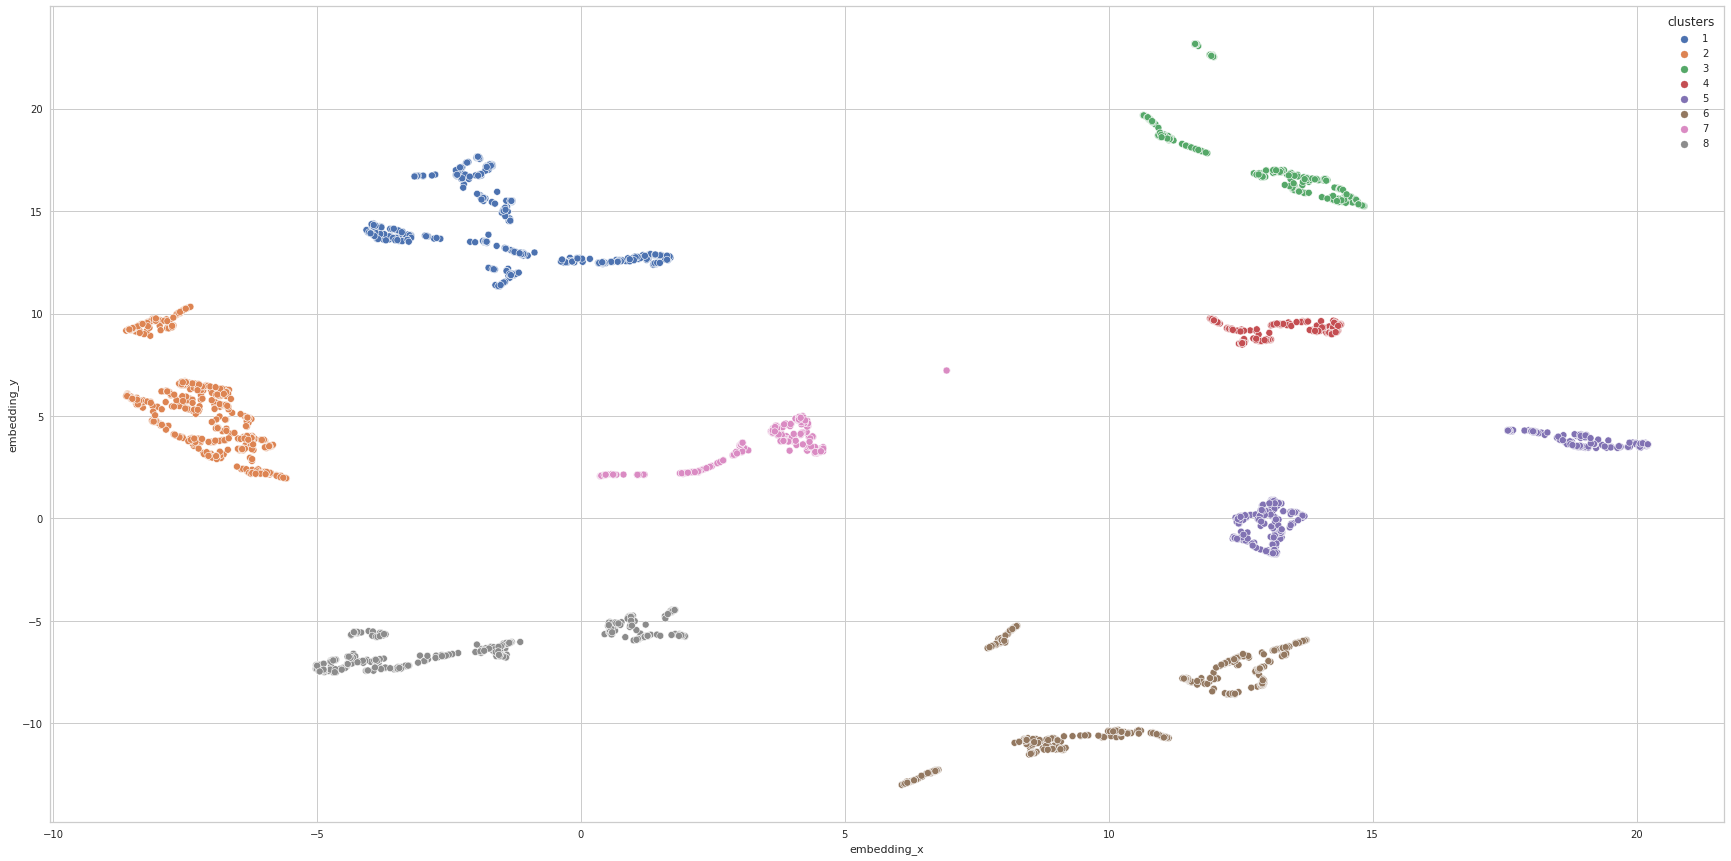

In [554]:
plt.figure(figsize=(30, 15))
sns.scatterplot(x='embedding_x', y='embedding_y', hue='clusters',palette='deep', data=X)

In [549]:
df8 = df4.copy()
df8['cluster'] = labels
df8.head()

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size  cluster
0        17850        5391.21         372.0           34.0      1733.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647        5
1        13047        3232.59          56.0            9.0      1390.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667        5
2        12583        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000        3
3        13748         948.25          95.0            5.0       439.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000        7
4        15100         876.00         333.0            3.0        80.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333        1

In [553]:
# Number of Customers for Cluster and Percentage by Cluster
df_cluster = df8[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(np.round(df_cluster['customer_id'] / df_cluster['customer_id'].sum(), decimals=5))

### Average Gross Revenue
df_avg_gross_revenue = df8[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_gross_revenue, decimals=2), how='inner', on='cluster')

### Average Recency Days
df_avg_recency_revenue = df8[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_recency_revenue, decimals=2), how='inner', on='cluster')

### Average Invoice N°
df_products = df8[['qtde_products', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_products, decimals=2), how='inner', on='cluster')

# frequency
df_frequency = df8[['frequency', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_frequency, decimals=2), how='inner', on='cluster')

# returns
df_returns = df8[['qtde_returns', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_returns, decimals=2), how='inner', on='cluster')

df_cluster.sort_values('gross_revenue', ascending=False)

cluster  customer_id  perc_customer  gross_revenue  recency_days  qtde_products  frequency  qtde_returns
2        3          292          9.825       15086.34         21.86         435.79       0.08        226.23
3        4          176          5.922        3900.39         27.02         229.41       0.04         36.56
4        5          365         12.281        2590.45         40.58         161.31       0.09         22.81
5        6          500         16.824        1718.17         41.36         115.04       0.04         21.70
7        8          399         13.425        1065.12         65.51          72.71       0.07         12.10
6        7          254          8.546         843.05         71.29          63.61       0.09          7.09
1        2          515         17.328         590.55         86.64          48.45       0.13          5.25
0        1          471         15.848         335.49        118.69          22.05       0.29          5.41

In [ ]:
3 Cluster 'insiders'
4 Cluster 'more products'
5 Cluster 'spend more'
6 Cluster 'middle revenue group / encrease frequency'
8 Cluster 'more products 2'
7 Cluster 'need lower recency'
2 Cluster 'need lower recenvy 2'
1 Cluster 'need lower recency 3'

In [532]:
# df9 = df6.copy()
# df9['cluster'] = labels
# df9.head()

# 9. Hipoteses Mindmap

# 10. Deploy
* AWS: deploy do streamlit na aws, parte free, um ano para usar a aws com o cpf.